In [7]:
import numpy as np
import numpy.linalg as al
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [11]:
def MatA(x,r):
    A = np.zeros( (len(x),len(x)) )
    dd = 2*(1+r)
    for i in range(len(x)-1):
        A[i,i] = dd # diagonal
        A[i,i+1] = -r # diagonal superior
        A[i+1,i] = -r # diagonal inferior
    A[-1,-1] = dd
    return A

def MatB(x,r):
    B = np.zeros( (len(x),len(x)) )
    dd = 2*(1-r)
    for i in range(len(x)-1):
        B[i,i] = dd # diagonal
        B[i,i+1] = r # diagonal superior
        B[i+1,i] = r # diagonal inferior
    B[-1,-1] = dd
    return B

def MetCR(x,t,Psi0,D=0.5):
    # Nota: Esto sirve solo para los puntos interiores de x y Psi0
    r = D*(t[1]-t[0])/((x[1]-x[0])**2)
    sol = np.zeros( (len(x),len(t)) )
    sol[:,0] = Psi0
    #print('r = ',r)
    if r < 1:
        A , B = MatA(x,r) , MatB(x,r)
        Ainv = al.inv(A)
        MatD = np.dot(Ainv,B)
        for i in range(len(t)-1):
            sol[:,i+1] = np.dot(MatD,sol[:,i])
        #Nota la solucion ya tiene las CoFo
        sol_comp = np.zeros( (len(x)+2,len(t)) )
        sol_comp[1:-1,:] = sol
    else:
        print('No hay convergencia')
    return sol_comp

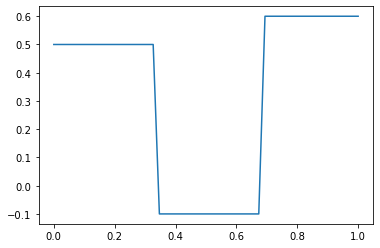

In [12]:
x = np.linspace(0,1,50)
P0 = np.zeros_like(x)
for i in range(len(x)):
    if i < len(x)/3:
        P0[i] = 0.5
    elif len(x)/3 <= i < 2*len(x)/3:
        P0[i] = -0.1
    else:
        P0[i] = 0.6
plt.plot(x,P0)
plt.show()

In [13]:
%%timeit
t = np.linspace(0,1,1500)
Psi_xt = MetCR(x[1:-1],t,P0[1:-1])

13.1 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%capture
figura , ejes = plt.subplots()
ejes.set_xlim([x[0],x[-1]]) , ejes.set_ylim([-0.15,0.65])
linea, = ejes.plot([],[])

def peli(i):
    linea.set_data(x,Psi_xt[:,i])
    return linea,

mi_pelicula = animation.FuncAnimation(figura,peli,frames=500,interval=40)

In [6]:
HTML(mi_pelicula.to_html5_video())